# *Importing Required Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-dataset/Iris_dataset.csv


# *Reading the file*

In [2]:
df = pd.read_csv('/kaggle/input/iris-dataset/Iris_dataset.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
data = df.drop(columns=['target','flower_name'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# *Feature Scaling*

here we did feature scaling to make each feature contributing equally because it may happen that one of the feature may affect the model due to its high value. so here I have used standard scaling not min-max scaling beacause min-max scaling will just scale down all values hence the ratio may remains same but in standard scaler all values are in specific range so that all feature may contribute well

In [4]:
scaler = StandardScaler()
data[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']] = scaler.fit_transform(df[['sepal length (cm)', 'sepal width (cm)','petal length (cm)','petal width (cm)']])
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# Elbow Method

here to check which value of k is optimal we are using elbow method where we will find the elbow in graph of SSE (sum of squared errors) v/s k (number of clusters) at this elbow we will see the value of k and that will be our optimal number of clusters.

In [5]:
k_rng = range(1,11)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit_predict(data)
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

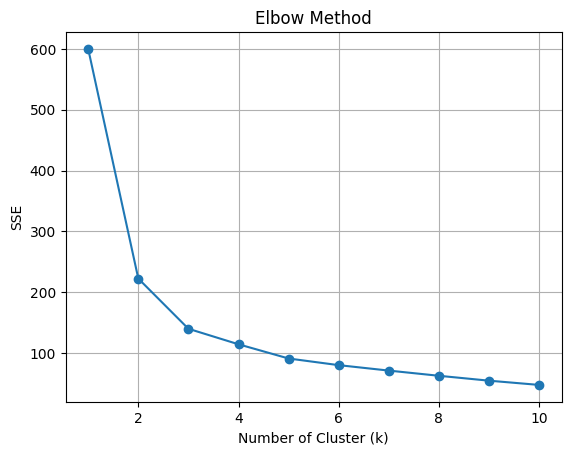

In [6]:
plt.plot(k_rng,sse,marker='o')
plt.xlabel('Number of Cluster (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.grid()

here k=3 is quite good you can also try k=2,4 but increasing k will decrease our SSE but it will lead to overfitting so k=2,3 is quite good

# *Visualizing Data*

initially here from these below two graphs i can see that k=2 is also good as there is visible two portions but here i have chosen k=3 you can check for other values too

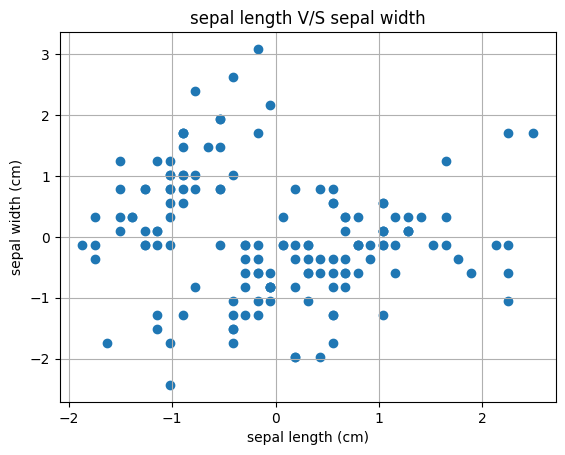

In [7]:
plt.scatter(data['sepal length (cm)'],data['sepal width (cm)'])
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('sepal length V/S sepal width')
plt.grid()

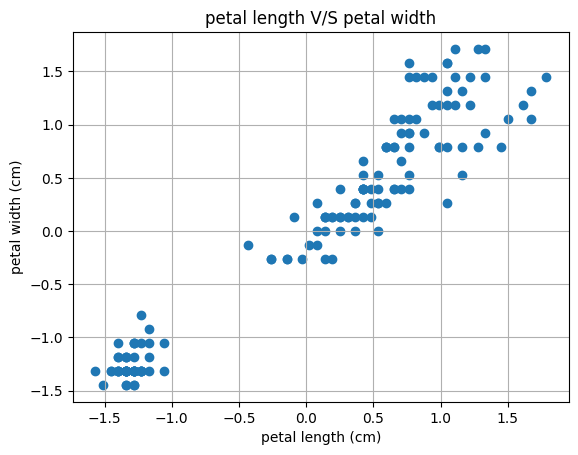

In [8]:
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('petal length V/S petal width')
plt.grid()

# *Model training*

In [9]:
model = KMeans(n_clusters = 3)
predicted=model.fit_predict(data)
predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [10]:
data['cluster'] = predicted
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,1
2,-1.385353,0.328414,-1.397064,-1.315444,1
3,-1.506521,0.098217,-1.283389,-1.315444,1
4,-1.021849,1.249201,-1.340227,-1.315444,1


# *Separate dataframes for each cluster*

In [11]:
data0 = data[data['cluster'] == 0]
data1 = data[data['cluster'] == 1]
data2 = data[data['cluster'] == 2]

In [12]:
model.cluster_centers_ # this gives us k number of centroids for each feature (column)

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

# *Visualizing clustered data with their centroids*

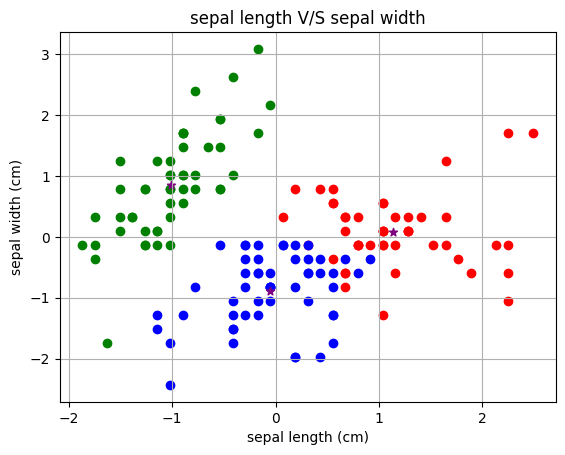

In [13]:
plt.scatter(data0['sepal length (cm)'],data0['sepal width (cm)'],color='red')
plt.scatter(data1['sepal length (cm)'],data1['sepal width (cm)'],color='green')
plt.scatter(data2['sepal length (cm)'],data2['sepal width (cm)'],color='blue')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('sepal length V/S sepal width')
plt.grid()

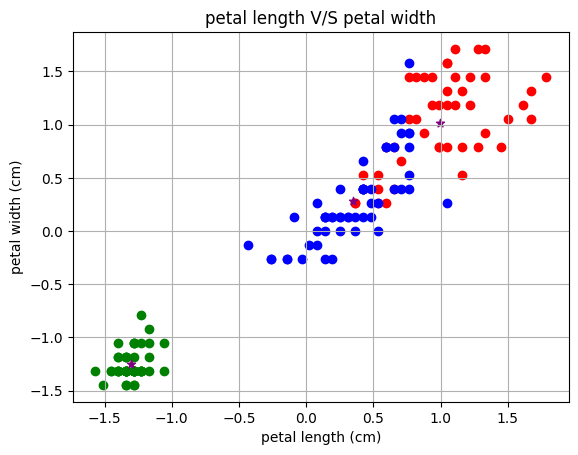

In [14]:
plt.scatter(data0['petal length (cm)'],data0['petal width (cm)'],color='red')
plt.scatter(data1['petal length (cm)'],data1['petal width (cm)'],color='green')
plt.scatter(data2['petal length (cm)'],data2['petal width (cm)'],color='blue')
plt.scatter(model.cluster_centers_[:,2],model.cluster_centers_[:,3],color='purple',marker='*')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('petal length V/S petal width')
plt.grid()

As you can see above i have made the three clusters visualization where the purple star is their centroid.

# Please Upvote Me, It will be alot of Help !!!!